In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching(image, r1, s1, r2, s2):
    def pixel_val(p):
        if p < r1:
            return (s1 / r1) * p
        elif r1 <= p <= r2:
            return ((s2 - s1) / (r2 - r1)) * (p - r1) + s1
        else:
            return ((255 - s2) / (255 - r2)) * (p - r2) + s2

    pixel_val_vec = np.vectorize(pixel_val)
    return pixel_val_vec(image).astype(np.uint8)



In [2]:
def intensity_level_slicing(image, min_range, max_range, high_val=255, low_val=0):
    sliced_image = np.where((image >= min_range) & (image <= max_range), high_val, low_val)
    return sliced_image.astype(np.uint8)

def bit_plane_slicing(image, bit):
    return np.bitwise_and(image, 1 << bit).astype(np.uint8) * 255

In [5]:
image = cv2.imread('Highcontrast.jpg', cv2.IMREAD_GRAYSCALE)

In [6]:
# Apply transformations
contrast_image = contrast_stretching(image, 70, 0, 140, 255)
sliced_image = intensity_level_slicing(image, 100, 200)
bit_plane_image = bit_plane_slicing(image, 3)

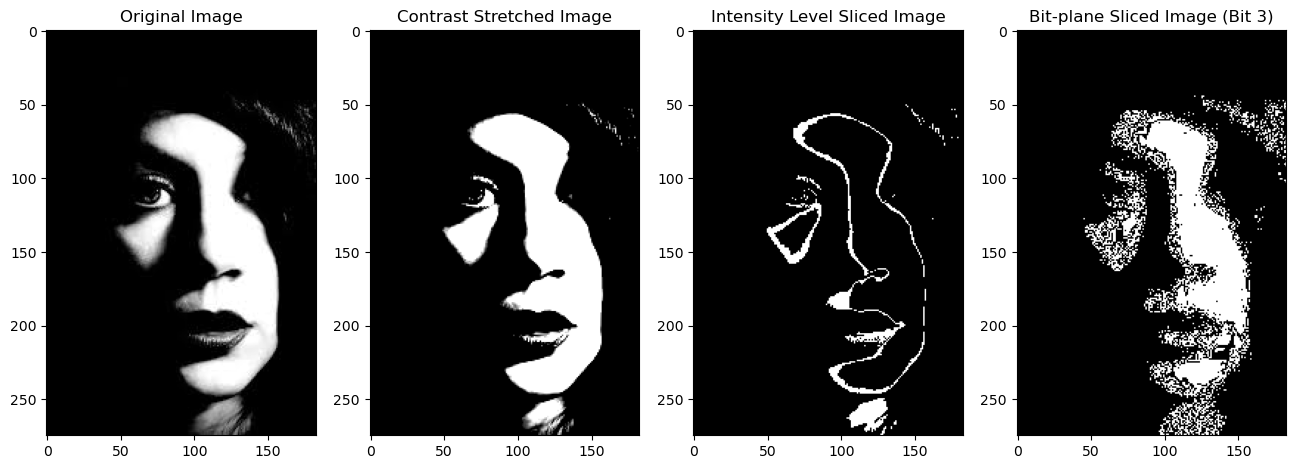

In [7]:
# Display the results
plt.figure(figsize=(16, 6))
plt.subplot(141), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(142), plt.imshow(contrast_image, cmap='gray'), plt.title('Contrast Stretched Image')
plt.subplot(143), plt.imshow(sliced_image, cmap='gray'), plt.title('Intensity Level Sliced Image')
plt.subplot(144), plt.imshow(bit_plane_image, cmap='gray'), plt.title('Bit-plane Sliced Image (Bit 3)')
plt.show()